In [56]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [57]:
# Cargar el dataset Wine
wine = datasets.load_wine()
X = wine.data

In [58]:
# Ver la información de las columnas usando un dataframe
wine_df = pd.DataFrame(data=X, columns=wine.feature_names)
wine_df.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0


In [59]:
# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [60]:
# Aplicar K-Means usando por ejemplo 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(X_scaled)
labels = kmeans.labels_

In [61]:
# Reducir las dimensiones a 2D PCA para poder graficar
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

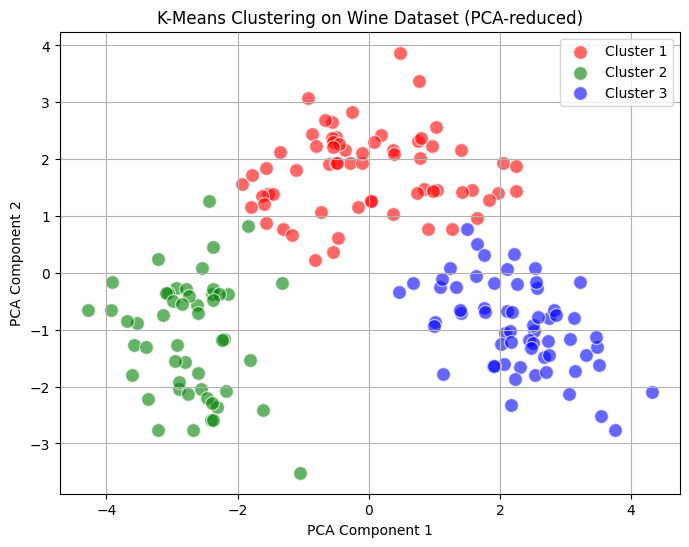

In [62]:
# Crear la gráfica de labels del cluster
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
for i in range(3):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1],
                color=colors[i], label=f'Cluster {i+1}', alpha=0.6, edgecolors='w', s=100)

plt.title('K-Means Clustering on Wine Dataset (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [63]:
# Crear nuevas columnas del df con resultados de clusters y etiquetas originales
y = wine.target # Etiquetas originales
wine_df['target'] = y
wine_df['cluster'] = labels
wine_df.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,cluster
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,2
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,2
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,2
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,2
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,2
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0,2
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0,2
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0,2
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0,2
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0,2


In [64]:
# Comparar los labels de K-Means con las etiquetas originales
comparison = pd.crosstab(wine_df['target'], wine_df['cluster'], rownames=['Original'], colnames=['Cluster'])
print(comparison)

Cluster    0   1   2
Original            
0          0   0  59
1         65   3   3
2          0  48   0
